# <div class="alert alert-block alert-info">Кейс недвижимость

## <a class="anchor" id="1"><div class="alert alert-block alert-info">Навигация:
[Описание данных](#2)<br>
[Задания](#3)<br>
[1. Ознакомление с данными](#4)<br>
[Выводы](#5)<br>
[2. Добавление информации из датасета region.csv ](#6)<br>
[Предобработка данных](#7)<br>
[3. Восстановление пропусков ](#8)<br>
[4.Исследование рынка недвижимости. Обработка анамалий](#9)<br>
[5.Когда выгодно покупать/продавать объекты недвижимости?](#10)<br>
[6. Определение от каких признаков зависит стоимость объекта недвижимости. Нахождение скрытых закономерностей.](#11)<br>
[7. Выдвижение собственной гипотезы и ее проверка статистическими методами](#12)<br>
[8.Модель прогноза цены объекта недвижимости](#13)<br>
[ВЫВОД](#14)<br>

<b><a class="anchor" id="2"></a><div class="alert alert-block alert-info">Описание данных</b>

Описание датасета realty_18_21.csv
* date - дата объявления
* region - Регион
* building_type - Тип дома 0 - Другое. 1 - Панельный. 2 - Кирпично-монолитный. 3 - Кирпичный. 4 - Блочный 5 - Деревянный
* object_type -  1 - Вторичный рынок; 11 - Первичный рынок;
* level - Этаж
* levels - Число этажей
* rooms - Число комнат, где -1 означает студия
* area - Общая площадь
* kitchen_area - Площадь кухни
* price - Цена в руб.

<b><a class="anchor" id="3"></a><div class="alert alert-block alert-info">Задания</b>

1. Познакомьтесь с данными.
2. Добавьте информацию из датасета region.csv.
3. Восстановите пропуски в столбце kitchen_area. 
4. Исследуйте рынок недвижимости в РФ за представленный период. Величина исследования - цена за м2. Обработайте аномалии.
5. Когда выгодно покупать/продавать объект недвижимости? 
6. Определите от каких признаков зависит стоимость объекта недвижимости. Найдите скрытые закономерности.
7. Выдвинете и проверьте собственную гипотезу статистическими методами.
8. Создайте модель прогноза цены объекта недвижимости.

[Вернуться к Навигации](#1)

### <a class="anchor" id="4"></a><div class="alert alert-block alert-info">1. Ознакомление с данными 

In [117]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import t, norm
from scipy import stats as st
from datetime import datetime 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.preprocessing import LabelEncoder 

In [118]:
data = pd.read_csv('realty_18_21.csv', sep = ',')
data.head() #первые пять строк датасета

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,2661,1,8,10,3,82.6,10.8,1
1,8650000,2018-02-27,81,3,5,24,2,69.1,12.0,1
2,4000000,2018-02-28,2871,1,5,9,3,66.0,10.0,1
3,1850000,2018-03-01,2843,4,12,16,2,38.0,5.0,11
4,5450000,2018-03-01,81,3,13,14,2,60.0,10.0,1


In [119]:
data.info() #основная информация о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5477006 entries, 0 to 5477005
Data columns (total 10 columns):
 #   Column         Dtype  
---  ------         -----  
 0   price          int64  
 1   date           object 
 2   region         int64  
 3   building_type  int64  
 4   level          int64  
 5   levels         int64  
 6   rooms          int64  
 7   area           float64
 8   kitchen_area   float64
 9   object_type    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 417.9+ MB


In [120]:
data.shape #размер датасета

(5477006, 10)

<div class="alert alert-block alert-success"> 
Датасет имеет 5 477 006 строк и 10 столбцов. Уже видно, что дата записана в неправильном формате. Также очень много строк, возможны проблемы в данных.

[Вернуться к Навигации](#1)

### <a class="anchor" id="6"></a><div class="alert alert-block alert-info">2. Добавление информации из датасета region.csv и предобработка данных

In [121]:
data['date'] = data['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [122]:
region = pd.read_csv('region.csv')
region.head(3)

,code,reg_name
0,2661,Санкт-Петербург
1,3446,Ленинградская область
2,3,Москва


In [123]:
region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   code      83 non-null     object
 1   reg_name  83 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


In [124]:
region.shape

(83, 2)

In [125]:
region['code'].unique() #в одном значении слепилось два, надо это исправить

array(['2661', '3446', '3', '81', '2843', '2871', '3230', '3106', '2922',
       '2900', '2722', '6171', '4417', '5282', '5368', '5520', '6817',
       '9579', '2604', '1010', '7793', '13919', '2860', '3019', '4982',
       '9648', '5241', '3870', '3991', '2359', '9654', '2072', '8090',
       '4007', '11171', '10160', '7873, 6937', '2594', '8509', '11416',
       '11991', '5178', '13913', '6309', '5952', '6543', '2880', '5993',
       '2484', '4240', '5789', '14880', '1491', '2885', '5794', '2528',
       '4374', '4695', '2328', '5143', '2806', '14368', '5736', '7121',
       '4086', '821', '10582', '7896', '8640', '5703', '10201', '4249',
       '3153', '4189', '2814', '13098', '8894', '7929', '16705', '69',
       '4963', '1901', '61888'], dtype=object)

In [126]:
data = data.rename(columns={'region': 'code'})
data.head(1)

,price,date,code,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,2661,1,8,10,3,82.6,10.8,1


In [127]:
region.iloc[36, 0] = 7873
new_row = pd.DataFrame({'code': [6937], 'reg_name': ['Республика Крым']})
region = pd.concat([region, new_row], ignore_index=True)
region.head(1)

,code,reg_name
0,2661,Санкт-Петербург


In [128]:
region['code'].unique() #проверяем

array(['2661', '3446', '3', '81', '2843', '2871', '3230', '3106', '2922',
       '2900', '2722', '6171', '4417', '5282', '5368', '5520', '6817',
       '9579', '2604', '1010', '7793', '13919', '2860', '3019', '4982',
       '9648', '5241', '3870', '3991', '2359', '9654', '2072', '8090',
       '4007', '11171', '10160', 7873, '2594', '8509', '11416', '11991',
       '5178', '13913', '6309', '5952', '6543', '2880', '5993', '2484',
       '4240', '5789', '14880', '1491', '2885', '5794', '2528', '4374',
       '4695', '2328', '5143', '2806', '14368', '5736', '7121', '4086',
       '821', '10582', '7896', '8640', '5703', '10201', '4249', '3153',
       '4189', '2814', '13098', '8894', '7929', '16705', '69', '4963',
       '1901', '61888', 6937], dtype=object)

In [129]:
region['code'] = region['code'].astype('int')

In [130]:
region[region['reg_name'] == 'Республика Крым']

,code,reg_name
36,7873,Республика Крым
83,6937,Республика Крым


In [131]:
data = pd.merge(data, region[['code', 'reg_name']], on='code', how='left')
data.head(1)

,price,date,code,building_type,level,levels,rooms,area,kitchen_area,object_type,reg_name
0,6050000,2018-02-19,2661,1,8,10,3,82.6,10.8,1,Санкт-Петербург


In [132]:
data.shape

(5477006, 11)

[Вернуться к Навигации](#1)

### <a class="anchor" id="7"></a><div class="alert alert-block alert-info">Предобработка данных

In [133]:
data['level'][data['level'] > data['levels']].count() #смотрим, чтобы этаж квартиры не был больше количества этажей в доме

1072

In [134]:
data = data[data['level'] <= data['levels']] #избавляемся от неправильных данных (где этаж квартиры выше этажей дома)
data.shape 

(5475934, 11)

In [135]:
data['level'].unique() #посмотрим какие уникальные значения остались для этажей

array([ 8,  5, 12, 13,  4,  1,  2,  9, 10, 25,  7,  6, 16, 17, 14, 11,  3,
       18, 15, 23, 21, 20, 22, 19, 28, 24, 26, 32, 30, 27, 31, 29, 34, 33,
       35, 37, 36, 39, 38])

In [136]:
data['levels'].unique()

array([10, 24,  9, 16, 14,  5, 25, 15, 17,  8,  2,  3, 18,  4, 22, 12, 20,
        7, 19,  6, 23, 27,  1, 21, 11, 28, 13, 36, 26, 33, 34, 30, 29, 35,
       32, 31, 37, 38, 39])

In [137]:
data['rooms'].unique() #посмотрим какие уникальные значения остались для комнат

array([ 3,  2,  1,  4, -1,  5,  7,  6,  8,  9, -2, 10])

In [138]:
data['rooms'][data['rooms'] == -2].count() 

343

In [139]:
data = data[data['rooms'] != -2] #избавляемся от нелогичных значений -2
data.shape

(5475591, 11)

[Вернуться к Навигации](#1)

### <a class="anchor" id="8"></a><div class="alert alert-block alert-info">3. Восстановление пропусков

In [140]:
data[data['kitchen_area'] >= data['area']]['area'].count() #смотрим сколько значений, где площадь кухни больше площади квартиры (это нелогично)

4207

In [141]:
data.isna().sum() #проверяем пропуски

price                 0
date                  0
code                  0
building_type         0
level                 0
levels                0
rooms                 0
area                  0
kitchen_area     253657
object_type           0
reg_name              0
dtype: int64

In [142]:
data['kitchen_area'].describe()

count    5.221934e+06
mean     1.062687e+01
std      9.848339e+00
min      1.000000e-02
25%      7.000000e+00
50%      9.700000e+00
75%      1.270000e+01
max      9.999000e+03
Name: kitchen_area, dtype: float64

In [143]:
# Копия данных для анализа до и после (для построения графиков)
data_before = data.copy()

In [144]:
#смотрим пропуски
data[data['kitchen_area'].isna()]

,price,date,code,building_type,level,levels,rooms,area,kitchen_area,object_type,reg_name
19,1650000,2018-03-16,2843,3,5,5,2,51.00,NaN,1,Краснодарский край
42,4400000,2018-04-14,81,3,11,14,2,54.00,NaN,1,Московская область
78,2980000,2018-06-04,4417,1,7,9,2,52.00,NaN,1,Республика Коми
114,2900000,2018-07-12,81,3,2,9,1,37.50,NaN,1,Московская область
136,5800000,2018-07-31,2661,2,6,14,1,47.10,NaN,1,Санкт-Петербург
...,...,...,...,...,...,...,...,...,...,...,...
5476919,3247500,2021-05-01,6543,0,7,12,-1,43.30,NaN,11,Архангельская область
5476924,4250770,2021-05-01,6543,0,12,12,2,59.87,NaN,11,Архангельская область
5476979,23319120,2021-05-01,3,2,2,11,3,96.36,NaN,11,Москва
5476982,13403880,2021-05-01,3,2,4,23,2,59.10,NaN,11,Москва


In [145]:
data[data.duplicated()][data['object_type'] == 1].head() #смотрим дубликаты по object_type

/var/folders/lb/cd5v5t1n0f38khmnw5v1brv40000gp/T/ipykernel_965/2353526785.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data.duplicated()][data['object_type'] == 1].head() #смотрим дубликаты по object_type


,price,date,code,building_type,level,levels,rooms,area,kitchen_area,object_type,reg_name
589,1050000,2018-09-08,9654,1,3,10,1,33.58,5.0,1,Новосибирская область
604,2250000,2018-09-08,9654,1,10,10,2,64.00,12.0,1,Новосибирская область
714,2310000,2018-09-08,9654,1,1,10,3,59.02,8.5,1,Новосибирская область
787,1750000,2018-09-08,9654,1,9,10,1,58.03,17.0,1,Новосибирская область
961,5789000,2018-09-08,9654,3,3,10,3,99.90,12.6,1,Новосибирская область


In [146]:
data[data.duplicated()][data['object_type'] == 1]['object_type'].count() #считаем количество дубликатов по вторичному рынку

/var/folders/lb/cd5v5t1n0f38khmnw5v1brv40000gp/T/ipykernel_965/1577468740.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data.duplicated()][data['object_type'] == 1]['object_type'].count() #считаем количество дубликатов по вторичному рынку


91485

In [147]:
duplicates = data[data.duplicated()][data['object_type'] == 1].index.tolist()
len(duplicates)

/var/folders/lb/cd5v5t1n0f38khmnw5v1brv40000gp/T/ipykernel_965/1582042852.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  duplicates = data[data.duplicated()][data['object_type'] == 1].index.tolist()


91485

In [148]:
data = data.drop(duplicates) #удаляем дубликаты на вторичном рынке
data.shape

(5384106, 11)

In [149]:
data[data.duplicated()]

,price,date,code,building_type,level,levels,rooms,area,kitchen_area,object_type,reg_name
466,1300000,2018-09-08,9654,1,5,10,1,41.36,10.88,11,Новосибирская область
516,906660,2018-09-08,9654,1,8,10,1,33.58,5.00,11,Новосибирская область
627,940000,2018-09-08,9654,1,4,10,1,33.58,5.00,11,Новосибирская область
781,1700000,2018-09-08,9654,1,10,10,2,58.00,8.00,11,Новосибирская область
820,1948000,2018-09-08,9654,1,2,10,3,87.39,13.00,11,Новосибирская область
...,...,...,...,...,...,...,...,...,...,...,...
5471624,9900000,2021-05-01,2661,2,10,19,1,51.00,23.10,11,Санкт-Петербург
5472040,9308100,2021-05-01,81,1,13,14,2,71.00,22.50,11,Московская область
5472763,6268800,2021-05-01,81,1,22,25,1,32.00,15.90,11,Московская область
5474038,3086520,2021-05-01,2661,2,12,18,-1,21.00,5.00,11,Санкт-Петербург


In [150]:
data.isna().sum() #проверяем пропуски

price                 0
date                  0
code                  0
building_type         0
level                 0
levels                0
rooms                 0
area                  0
kitchen_area     253353
object_type           0
reg_name              0
dtype: int64

<div class="alert alert-block alert-success"> 
Данное решение было принято, так как идентичные объявления вполне могут быть на первичном рынке, однако на вторичном рынке такие объявления не совсем логичны, ведь одна и та же квартира не может продаваться дважды с одинаковыми условиями.

In [151]:
# Проверяем наличие пропусков
print(f"Пропуски в kitchen_area до заполнения: {data['kitchen_area'].isnull().sum()}")

Пропуски в kitchen_area до заполнения: 253353


In [152]:
# Разделение данных с пропусками и без них
missing_kitchen = data[data['kitchen_area'].isnull()]
not_missing_kitchen = data[data['kitchen_area'].notnull()]

In [153]:
# Признаки и целевая переменная
features = ['area', 'rooms', 'building_type', 'levels', 'level']
target = 'kitchen_area'

In [154]:
# Подготовка данных
X_train = not_missing_kitchen[features]
y_train = not_missing_kitchen[target]
X_missing = missing_kitchen[features]


In [155]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [156]:
# Предобработка данных
numeric_features = ['area', 'levels', 'level']
categorical_features = ['rooms', 'building_type']

numeric_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [157]:
# Построение пайплайна
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [158]:
# Обучение модели
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['area', 'levels', 'level']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['rooms',
                                                   'building_type'])])),
                ('regressor', LinearRegression())])

In [159]:
# Предсказание пропусков
data.loc[data['kitchen_area'].isnull(), 'kitchen_area'] = model.predict(X_missing)


In [160]:
# Проверка результата
print(f"Пропуски в kitchen_area после заполнения: {data['kitchen_area'].isnull().sum()}")

Пропуски в kitchen_area после заполнения: 0


In [161]:
data_before['kitchen_area'].describe() 

count    5.221934e+06
mean     1.062687e+01
std      9.848339e+00
min      1.000000e-02
25%      7.000000e+00
50%      9.700000e+00
75%      1.270000e+01
max      9.999000e+03
Name: kitchen_area, dtype: float64

In [162]:
data['kitchen_area'].describe()

count    5.384106e+06
mean     1.064338e+01
std      9.693974e+00
min      1.000000e-02
25%      7.000000e+00
50%      9.850000e+00
75%      1.260000e+01
max      9.999000e+03
Name: kitchen_area, dtype: float64

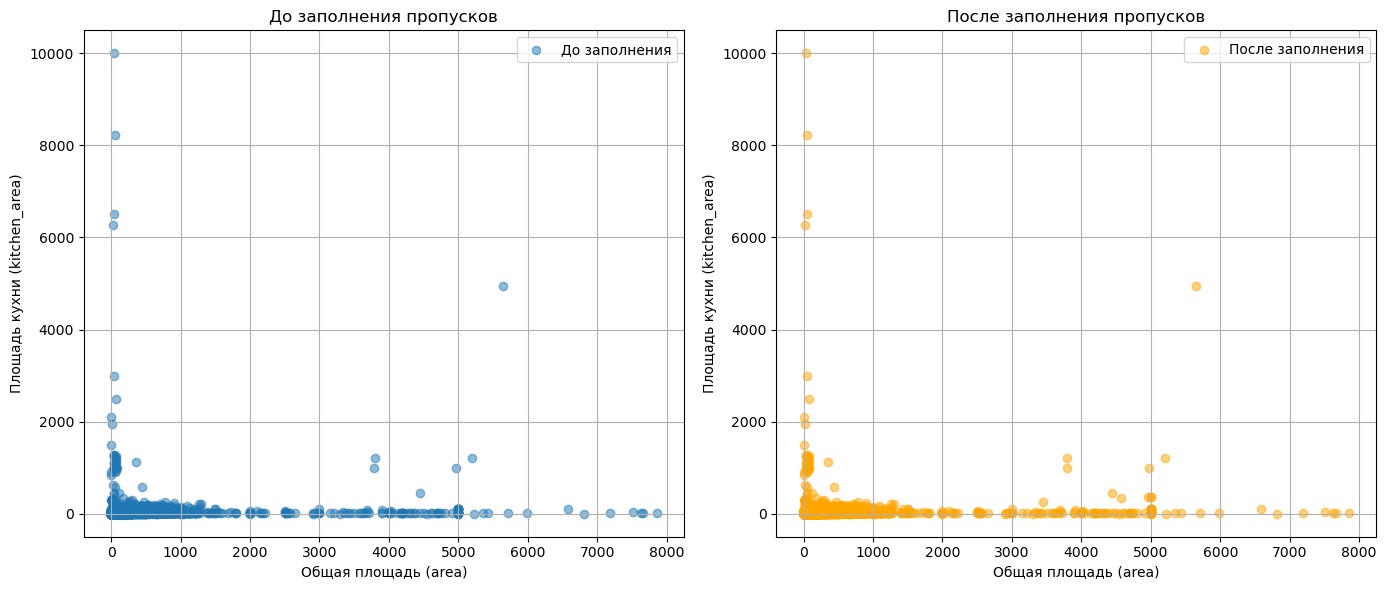

In [163]:

# Построение scatter-графиков
plt.figure(figsize=(14, 6))

# График до заполнения пропусков
plt.subplot(1, 2, 1)
plt.scatter(data_before['area'], data_before['kitchen_area'], alpha=0.5, label='До заполнения')
plt.title('До заполнения пропусков')
plt.xlabel('Общая площадь (area)')
plt.ylabel('Площадь кухни (kitchen_area)')
plt.grid()
plt.legend()

# График после заполнения пропусков
plt.subplot(1, 2, 2)
plt.scatter(data['area'], data['kitchen_area'], alpha=0.5, color='orange', label='После заполнения')
plt.title('После заполнения пропусков')
plt.xlabel('Общая площадь (area)')
plt.ylabel('Площадь кухни (kitchen_area)')
plt.grid()
plt.legend()

# Отображение графиков
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success"> 
Таким образом мы заполнили пропуски в kitchen_area с помощью модели линейной регрессии и пайплайна. Больше пропущенных значений у нас нет. По describe можем видеть небольшие изменения в данных. На графиках сущетвенная разница не видна.

In [164]:
data = data[data['area'] > data['kitchen_area']] #избавляемся от этих значений, где площадь кухни больше площади квартиры
data.shape 

(5379733, 11)

In [165]:
data['building_type'] = data['building_type'].replace({0: 'Другое', 1: 'Панельный', 2: 'Кирпично-монолитный', 3: 'Кирпичный', 4: 'Блочный', 5: 'Деревянный'})

In [166]:
data['building_type'].value_counts()

Панельный              1895997
Кирпичный              1865649
Кирпично-монолитный    1126296
Другое                  303323
Блочный                 172350
Деревянный               16118
Name: building_type, dtype: int64

[Вернуться к Навигации](#1)

### <a class="anchor" id="9"></a><div class="alert alert-block alert-info">4.Исследование рынка недвижимости. Обработка анамалий

In [167]:
#убираем отрицательные значения цены
data = data[data['price'] >= 0]

<div class="alert alert-block alert-success"> 
В принципе есть вероятность, что отрицательные значения цены просто как ошибка, однако, если брать по модулю, то слишком весомые данные и они могут негатвино повлиять на исследование, поэтому было принято решение об их исключении.

In [168]:
data.shape

(5379369, 11)

In [169]:
data['price_for_1m2'] = round(data['price'] / data['area'], 2)
data['area_for_room'] = round((data['area'] - data['kitchen_area']) / abs(data['rooms']), 2)
data.head(1)

,price,date,code,building_type,level,levels,rooms,area,kitchen_area,object_type,reg_name,price_for_1m2,area_for_room
0,6050000,2018-02-19,2661,Панельный,8,10,3,82.6,10.8,1,Санкт-Петербург,73244.55,23.93


<div class="alert alert-block alert-success"> 
Добавляем переменные price_for_1m2 - цена за 1 кв м и area_for_room - площадь комнат без кухни. <br>  Они нам помогут для работы и анализа в дальнейшем.

In [170]:
#находим нижнюю и верхнюю границы
outliers_1m2_l = np.percentile(data['price_for_1m2'], 0.1)
outliers_1m2_h = np.percentile(data['price_for_1m2'], 99.9)
print('Нижняя граница - ', outliers_1m2_l)
print('Верхняя граница - ', outliers_1m2_h)

Нижняя граница -  3653.3524000000007
Верхняя граница -  674121.5639200209


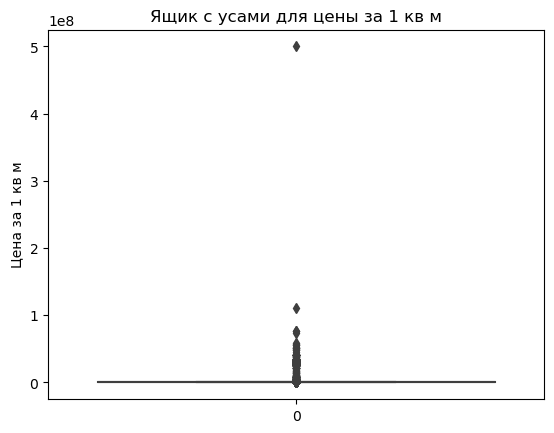

In [171]:
sns.boxplot(data['price_for_1m2']).set(title='Ящик с усами для цены за 1 кв м', ylabel='Цена за 1 кв м')
plt.show()

In [172]:
#исключаем значения, которые не входят в пределы границ и являются анамальными
data = data[(data['price_for_1m2'] > outliers_1m2_l) & ((data['price_for_1m2'] < outliers_1m2_h))]

In [173]:
data.shape

(5368609, 13)

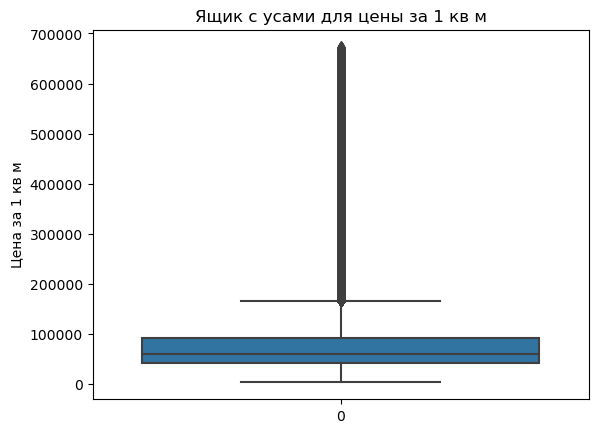

In [174]:
sns.boxplot(data['price_for_1m2']).set(title='Ящик с усами для цены за 1 кв м', ylabel='Цена за 1 кв м')
plt.show()

In [175]:
data['price_for_1m2'].describe()

count    5.368609e+06
mean     7.820396e+04
std      5.743331e+04
min      3.654490e+03
25%      4.320823e+04
50%      6.125000e+04
75%      9.206349e+04
max      6.740604e+05
Name: price_for_1m2, dtype: float64

<div class="alert alert-block alert-success"> 
Изменения в данных до удаления критических значений и анамалий не наблюдается, поэтому можно исключить выбросы

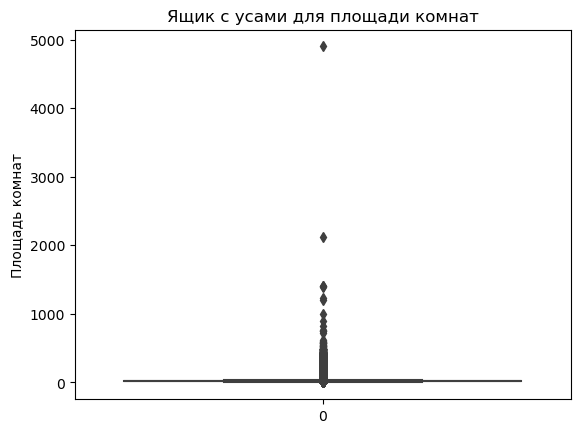

In [176]:
sns.boxplot(data['area_for_room']).set(title='Ящик с усами для площади комнат', ylabel='Площадь комнат')
plt.show()

In [179]:
data['area_for_room'].describe()

count    5.368609e+06
mean     2.470563e+01
std      9.044917e+00
min      0.000000e+00
25%      1.970000e+01
50%      2.400000e+01
75%      2.800000e+01
max      4.900000e+03
Name: area_for_room, dtype: float64

<div class="alert alert-block alert-success"> 
Согласно СНиП (Строительным Нормам и Правилам), где от 2011 года площадь жилой комнаты не должна составлять менее 8 кв.м. - п. 5.3 СП 5.413330.2011. <br>
Данные должны быть подходящими и соответсвующими

In [180]:
#находим верхнюю и нижнюю границы для площади комнаты
outliers_room_l = 8
outliers_room_h = np.nanpercentile(data['area_for_room'], 99.99)
print('Нижняя граница - ', outliers_room_l)
print('Верхняя граница - ', outliers_room_h)

Нижняя граница -  8
Верхняя граница -  304.0


In [181]:
#исключаем значения, которые выходят за границы
data = data[(data['area_for_room'] > outliers_room_l) & ((data['area_for_room'] < outliers_room_h))]

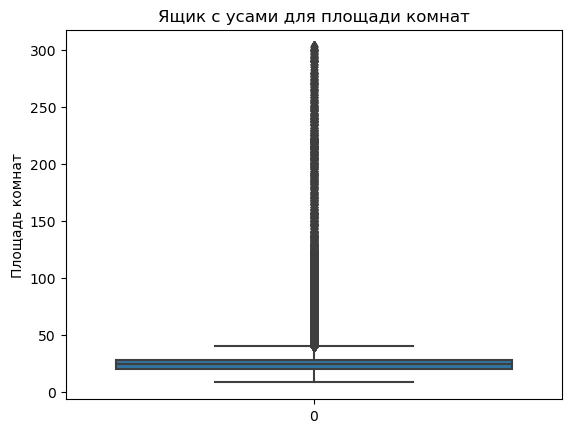

In [182]:
sns.boxplot(data['area_for_room']).set(title='Ящик с усами для площади комнат', ylabel='Площадь комнат')
plt.show()

In [183]:
data['area_for_room'].describe()

count    5.353578e+06
mean     2.472062e+01
std      7.835417e+00
min      8.020000e+00
25%      1.975000e+01
50%      2.400000e+01
75%      2.800000e+01
max      3.030000e+02
Name: area_for_room, dtype: float64

In [184]:
data.shape

(5353578, 13)

In [186]:
data[data['area_for_room'] == data['area_for_room'].min()] #проверяем минимальную площадь комнаты

,price,date,code,building_type,level,levels,rooms,area,kitchen_area,object_type,reg_name,price_for_1m2,area_for_room
68542,2634028,2018-09-18,2661,Другое,8,23,3,34.97,10.920000,1,Санкт-Петербург,75322.51,8.02
74860,2706636,2018-09-18,2661,Другое,27,27,3,36.88,12.834569,1,Санкт-Петербург,73390.35,8.02
860275,4186050,2018-12-31,3,Кирпично-монолитный,27,33,1,21.50,13.480522,11,Москва,194700.00,8.02
2783101,6799000,2019-10-25,3,Кирпично-монолитный,5,12,5,50.10,10.000000,1,Москва,135708.58,8.02
3231109,1165800,2020-02-01,3230,Кирпично-монолитный,15,25,1,20.10,12.082481,11,Ростовская область,58000.00,8.02


<div class="alert alert-block alert-success"> 
После удаления выбросов данные изменились незначительно. Однако удаление экстримальных выбросов могло значително повлиять на исследование данных, поэтому было принято решение об исключение выбросов именно в тех границах, которые посчитаны выше. <br>

Мы сохраняем основной набор исследуемых данных, при этом исключаем данные, которые могут сбить при исследовании. Верхняя граница посчитана по перцентилю, как мы считали ранее, нижняя граница расчитана из правил СНиП в России.  <br>

Также минимальная площадь комнаты соотвествует требованиям. В новых боксплотах тоже есть выбросы, но их большее количество, они значимы для исследования.

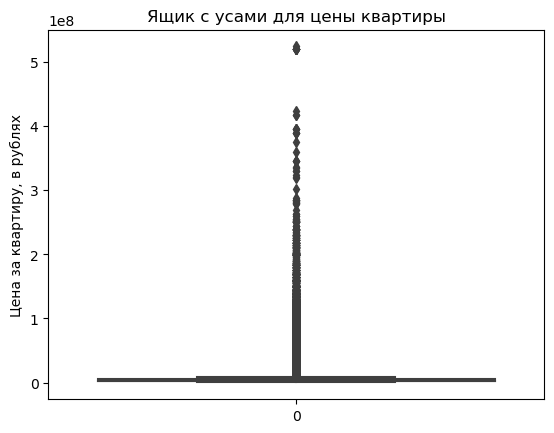

In [187]:
#строим boxplot для цены
sns.boxplot(data['price']).set(title='Ящик с усами для цены квартиры', ylabel='Цена за квартиру, в рублях')
plt.show()

In [188]:
data[data['price'] > 5000000]

,price,date,code,building_type,level,levels,rooms,area,kitchen_area,object_type,reg_name,price_for_1m2,area_for_room
0,6050000,2018-02-19,2661,Панельный,8,10,3,82.6,10.8,1,Санкт-Петербург,73244.55,23.93
1,8650000,2018-02-27,81,Кирпичный,5,24,2,69.1,12.0,1,Московская область,125180.90,28.55
4,5450000,2018-03-01,81,Кирпичный,13,14,2,60.0,10.0,1,Московская область,90833.33,25.00
10,6909880,2018-03-06,81,Панельный,9,14,3,76.1,8.8,11,Московская область,90800.00,22.43
12,6675840,2018-03-06,81,Панельный,25,25,3,73.2,12.4,11,Московская область,91200.00,20.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5477001,19739760,2021-05-01,3,Панельный,8,17,4,93.2,13.8,11,Москва,211800.00,19.85
5477002,12503160,2021-05-01,3,Кирпично-монолитный,17,32,2,45.9,6.6,11,Москва,272400.00,19.65
5477003,8800000,2021-05-01,2871,Кирпично-монолитный,4,17,3,86.5,11.8,1,Нижегородская область,101734.10,24.90
5477004,11831910,2021-05-01,3,Панельный,8,33,2,52.1,18.9,11,Москва,227100.00,16.60


<div class="alert alert-block alert-success"> 
По boxplot видно выбросы, значения которых больше 5 млн рублей, однако если их смотреть ближе, то их количество слишком весомое для исключения, поэтому принято решение не исключать выбросы

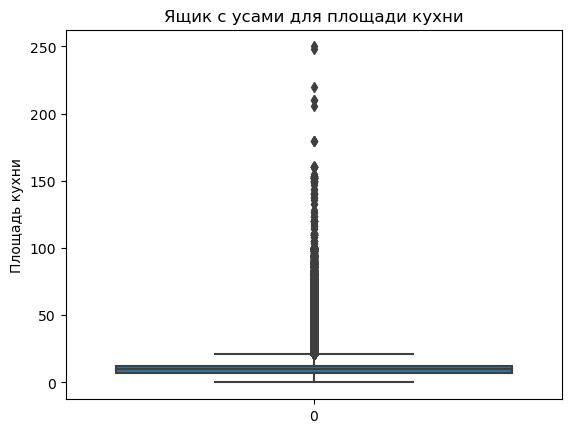

In [193]:
#ящик с усами для площади кухни
sns.boxplot(data['kitchen_area']).set(title='Ящик с усами для площади кухни', ylabel='Площадь кухни')
plt.show()

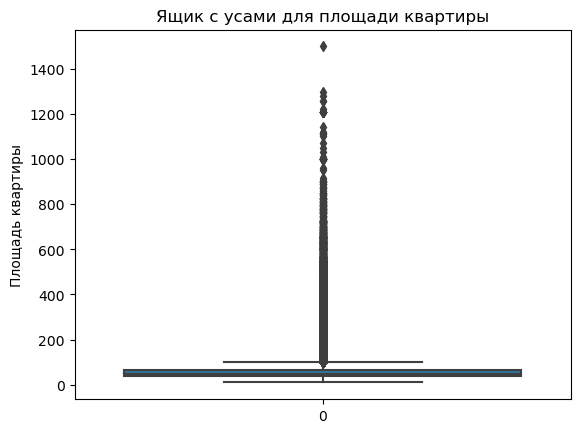

In [194]:
#строим boxplot по площади всей квартиры
sns.boxplot(data['area']).set(title='Ящик с усами для площади квартиры', ylabel='Площадь квартиры')
plt.show()

In [189]:
data.shape

(5353578, 13)

In [190]:
#проверяем какой объем данных удален в процентном соотношении к первичному набору данных
data1 = 5477006
data2 = 5353578
delta = ((data1-data2) / data1)*100
print('Изменение размера данных составило: ', round(delta, 3), '%')
if delta < 5:
    print('Удален приемлимый набор данных')
else:
    print('Удалено много данных')

Изменение размера данных составило:  2.254 %
Удален приемлимый набор данных


In [191]:
data.isna().sum()

price            0
date             0
code             0
building_type    0
level            0
levels           0
rooms            0
area             0
kitchen_area     0
object_type      0
reg_name         0
price_for_1m2    0
area_for_room    0
dtype: int64

In [192]:
data['object_type'] = data['object_type'].replace({1: 'вторичный', 11: 'первичный'})
data.head()

/var/folders/lb/cd5v5t1n0f38khmnw5v1brv40000gp/T/ipykernel_965/3680782910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['object_type'] = data['object_type'].replace({1: 'вторичный', 11: 'первичный'})


,price,date,code,building_type,level,levels,rooms,area,kitchen_area,object_type,reg_name,price_for_1m2,area_for_room
0,6050000,2018-02-19,2661,Панельный,8,10,3,82.6,10.8,вторичный,Санкт-Петербург,73244.55,23.93
1,8650000,2018-02-27,81,Кирпичный,5,24,2,69.1,12.0,вторичный,Московская область,125180.90,28.55
2,4000000,2018-02-28,2871,Панельный,5,9,3,66.0,10.0,вторичный,Нижегородская область,60606.06,18.67
3,1850000,2018-03-01,2843,Блочный,12,16,2,38.0,5.0,первичный,Краснодарский край,48684.21,16.50
4,5450000,2018-03-01,81,Кирпичный,13,14,2,60.0,10.0,вторичный,Московская область,90833.33,25.00


<div class="alert alert-block alert-success"> 
Мы произвели обработку аномалий:

<br>1.По столбцам с ценой за кв.м. и площади комнат в квартире были удалены основыне выбросы и исключены аномалии, которые могли повлиять на ход исследования в отрицательную сторону;

<br>2.Были просмотрены выбросы по цене, площади квартиры и площади кухни отдельно, что позволило убедиться в том, что основные значения и данные, которые были исключены, мы исключили верно;

<br>3.Изменение объема данных в процентном соотношении составило 2,254%, что является приемлимым и говорит о том, что основной набор данных для исследования сохранен и можно переходить к следующим шагам.

In [196]:
data[{'price', 'area', 'price_for_1m2'}].describe()

/var/folders/lb/cd5v5t1n0f38khmnw5v1brv40000gp/T/ipykernel_965/281504687.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  data[{'price', 'area', 'price_for_1m2'}].describe()


,price_for_1m2,price,area
count,5.353578e+06,5.353578e+06,5.353578e+06
mean,7.800242e+04,4.338178e+06,5.375535e+01
std,5.671309e+04,5.428380e+06,2.491592e+01
min,3.654490e+03,7.000000e+04,9.500000e+00
25%,4.320339e+04,1.950000e+06,3.810000e+01
50%,6.125000e+04,3.000000e+06,4.802000e+01
75%,9.200000e+04,4.860000e+06,6.313000e+01
max,6.740604e+05,5.244898e+08,1.500000e+03


In [ ]:
#посмотрим топ-5 самых дорогих квартир
top_5_price = data.nlargest(5, 'price')
top_5_price

,price,date,code,building_type,level,levels,rooms,area,kitchen_area,object_type,reg_name,price_for_1m2,area_for_room
4678283,524489850,2020-11-06,3,Кирпично-монолитный,1,3,6,845.6,100.0,вторичный,Москва,620257.63,124.27
2853324,520000345,2019-11-08,2661,Другое,1,3,5,1211.0,21.6,вторичный,Санкт-Петербург,429397.48,237.88
2875101,520000345,2019-11-13,2661,Другое,1,3,5,1211.0,21.6,вторичный,Санкт-Петербург,429397.48,237.88
3100050,520000345,2019-12-29,2661,Другое,1,3,5,1211.0,21.6,вторичный,Санкт-Петербург,429397.48,237.88
3318136,520000345,2020-02-22,2661,Другое,1,3,5,1211.0,21.6,вторичный,Санкт-Петербург,429397.48,237.88


In [ ]:
#посмотрим топ-5 самых больших квартир
top_5_area = data.nlargest(5, 'area')
top_5_area

,price,date,code,building_type,level,levels,rooms,area,kitchen_area,object_type,reg_name,price_for_1m2,area_for_room
2874028,5850000,2019-11-12,4007,Кирпично-монолитный,8,9,5,1500.0,18.0,первичный,Республика Дагестан,3900.00,296.4
1844696,17500000,2019-05-22,2843,Кирпично-монолитный,16,25,4,1300.0,220.0,вторичный,Краснодарский край,13461.54,270.0
1838298,6500000,2019-05-21,6817,Кирпичный,2,10,4,1280.0,150.0,вторичный,Алтайский край,5078.12,282.5
1836865,7700000,2019-05-21,5282,Кирпичный,2,24,4,1260.0,210.0,вторичный,Челябинская область,6111.11,262.5
3402202,5600000,2020-03-04,2843,Кирпично-монолитный,4,4,5,1260.0,90.0,первичный,Краснодарский край,4444.44,234.0


In [199]:
#посмотрим топ-5 самых дорогих квартир по цене за 1 кв.м.
top_5_1m2 = data.nlargest(5, 'price_for_1m2')
top_5_1m2

,price,date,code,building_type,level,levels,rooms,area,kitchen_area,object_type,reg_name,price_for_1m2,area_for_room
5156264,178626000,2021-03-16,3,Кирпично-монолитный,3,5,5,265.0,30.000000,вторичный,Москва,674060.38,47.00
4642531,92980216,2020-10-31,3,Кирпично-монолитный,7,9,3,138.0,17.870273,первичный,Москва,673769.68,40.04
4718305,53900000,2020-11-16,3,Кирпично-монолитный,12,14,3,80.0,10.000000,вторичный,Москва,673750.00,23.33
889681,119000000,2019-01-06,3,Кирпично-монолитный,32,35,4,176.7,20.000000,вторичный,Москва,673457.84,39.17
4676649,96300000,2020-11-06,3,Кирпично-монолитный,2,14,4,143.0,18.600000,вторичный,Москва,673426.57,31.10


<div class="alert alert-block alert-success"> 
Если по максимальной цене вопросов особо не возникает, что самые дорогие квартиры в Санкт-Петербурге и Москве - столицах России (одна официальная, другая культурная).

<br> По самой большой площади было небольшое удивление, что самые большие площади на Юге: Дагестане и Краснодаре, а также в Челябинской области и на Алтае. 

<br> Несомненно самая большая цена за 1 кв.м. в Москве, что и следовало ожидать

[Вернуться к Навигации](#1)

### <a class="anchor" id="10"></a><div class="alert alert-block alert-info">5.Когда выгодно покупать/продавать объекты недвижимости?

In [203]:
#добавляем месяц
data['month'] = data['date'].dt.month
data

/var/folders/lb/cd5v5t1n0f38khmnw5v1brv40000gp/T/ipykernel_965/2529229248.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month'] = data['date'].dt.month


,price,date,code,building_type,level,levels,rooms,area,kitchen_area,object_type,reg_name,price_for_1m2,area_for_room,month
0,6050000,2018-02-19,2661,Панельный,8,10,3,82.6,10.8,вторичный,Санкт-Петербург,73244.55,23.93,2
1,8650000,2018-02-27,81,Кирпичный,5,24,2,69.1,12.0,вторичный,Московская область,125180.90,28.55,2
2,4000000,2018-02-28,2871,Панельный,5,9,3,66.0,10.0,вторичный,Нижегородская область,60606.06,18.67,2
3,1850000,2018-03-01,2843,Блочный,12,16,2,38.0,5.0,первичный,Краснодарский край,48684.21,16.50,3
4,5450000,2018-03-01,81,Кирпичный,13,14,2,60.0,10.0,вторичный,Московская область,90833.33,25.00,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5477001,19739760,2021-05-01,3,Панельный,8,17,4,93.2,13.8,первичный,Москва,211800.00,19.85,5
5477002,12503160,2021-05-01,3,Кирпично-монолитный,17,32,2,45.9,6.6,первичный,Москва,272400.00,19.65,5
5477003,8800000,2021-05-01,2871,Кирпично-монолитный,4,17,3,86.5,11.8,вторичный,Нижегородская область,101734.10,24.90,5
5477004,11831910,2021-05-01,3,Панельный,8,33,2,52.1,18.9,первичный,Москва,227100.00,16.60,5


In [201]:
sum_price = data.groupby(['month', 'object_type', 'date'])['price'].agg(['sum', 'count', 'mean']).reset_index()
sum_price.head()

,month,object_type,date,sum,count,mean
0,1,вторичный,2019-01-01,14544442295,4708,3.089304e+06
1,1,вторичный,2019-01-02,6817062085,1863,3.659185e+06
2,1,вторичный,2019-01-03,4651605005,1420,3.275778e+06
3,1,вторичный,2019-01-04,5662387461,1864,3.037762e+06
4,1,вторичный,2019-01-05,7054908766,2099,3.361081e+06


In [202]:
price = sum_price.sort_values(by='month')
price.head()

,month,object_type,date,sum,count,mean
0,1,вторичный,2019-01-01,14544442295,4708,3.089304e+06
119,1,первичный,2019-01-27,15217804953,2952,5.155083e+06
120,1,первичный,2019-01-28,9341323416,2561,3.647530e+06
121,1,первичный,2019-01-29,7693796748,2331,3.300642e+06
122,1,первичный,2019-01-30,8465933357,2597,3.259890e+06


In [204]:
#добавляем сезон
def get_season(month):
    if month in [12, 1, 2]:
        return 'Зима'
    elif month in [3, 4, 5]:
        return 'Весна'
    elif month in [6, 7, 8]:
        return 'Лето'
    else:
        return 'Осень'
    
data['season'] = data['date'].dt.month.apply(get_season)
data.head(1)

/var/folders/lb/cd5v5t1n0f38khmnw5v1brv40000gp/T/ipykernel_965/2409531324.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['season'] = data['date'].dt.month.apply(get_season)


,price,date,code,building_type,level,levels,rooms,area,kitchen_area,object_type,reg_name,price_for_1m2,area_for_room,month,season
0,6050000,2018-02-19,2661,Панельный,8,10,3,82.6,10.8,вторичный,Санкт-Петербург,73244.55,23.93,2,Зима


In [205]:
month_map = {
    1: 'Январь',
    2: 'Февраль',
    3: 'Март',
    4: 'Апрель',
    5: 'Май',
    6: 'Июнь',
    7: 'Июль',
    8: 'Август',
    9: 'Сентябрь',
    10: 'Октябрь',
    11: 'Ноябрь',
    12: 'Декабрь'
}

In [207]:
#именуем месяц
price['month'] = price['month'].replace(month_map)
price.head()

,month,object_type,date,sum,count,mean
0,Январь,вторичный,2019-01-01,14544442295,4708,3.089304e+06
119,Январь,первичный,2019-01-27,15217804953,2952,5.155083e+06
120,Январь,первичный,2019-01-28,9341323416,2561,3.647530e+06
121,Январь,первичный,2019-01-29,7693796748,2331,3.300642e+06
122,Январь,первичный,2019-01-30,8465933357,2597,3.259890e+06


/var/folders/lb/cd5v5t1n0f38khmnw5v1brv40000gp/T/ipykernel_965/813588279.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(ax=axes[0], data=price, x='month', y='sum', hue='object_type', ci=None, palette='viridis')
/var/folders/lb/cd5v5t1n0f38khmnw5v1brv40000gp/T/ipykernel_965/813588279.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(ax=axes[1], data=price, x='month', y='count', hue='object_type', ci=None, palette='viridis')
/var/folders/lb/cd5v5t1n0f38khmnw5v1brv40000gp/T/ipykernel_965/813588279.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(ax=axes[2], data=price, x='month', y='mean', hue='object_type', ci=None, palette='viridis')


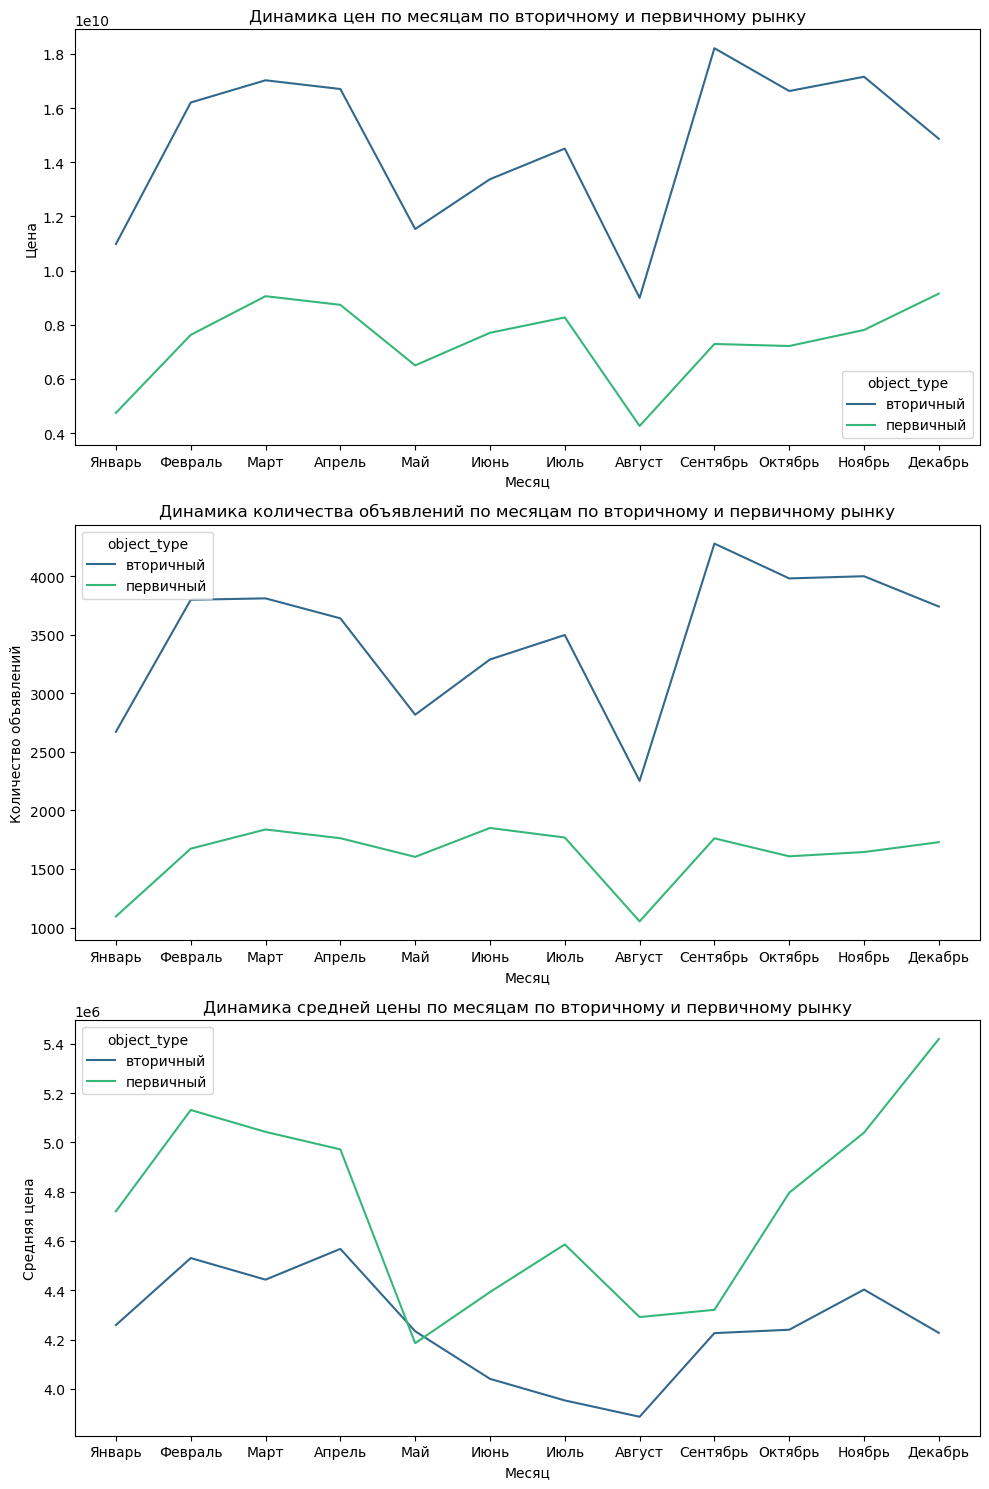

In [209]:
#визуализируем, чтобы посмотреть динамику цен, количества объявлений и средней цены по месяцам по вторичному и первичному рынку
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

sns.lineplot(ax=axes[0], data=price, x='month', y='sum', hue='object_type', ci=None, palette='viridis')
axes[0].set(title='Динамика цен по месяцам по вторичному и первичному рынку', xlabel='Месяц', ylabel='Цена')

sns.lineplot(ax=axes[1], data=price, x='month', y='count', hue='object_type', ci=None, palette='viridis')
axes[1].set(title='Динамика количества объявлений по месяцам по вторичному и первичному рынку', xlabel='Месяц', ylabel='Количество объявлений')

sns.lineplot(ax=axes[2], data=price, x='month', y='mean', hue='object_type', ci=None, palette='viridis')
axes[2].set(title='Динамика средней цены по месяцам по вторичному и первичному рынку', xlabel='Месяц', ylabel='Средняя цена')

plt.tight_layout()
plt.show()

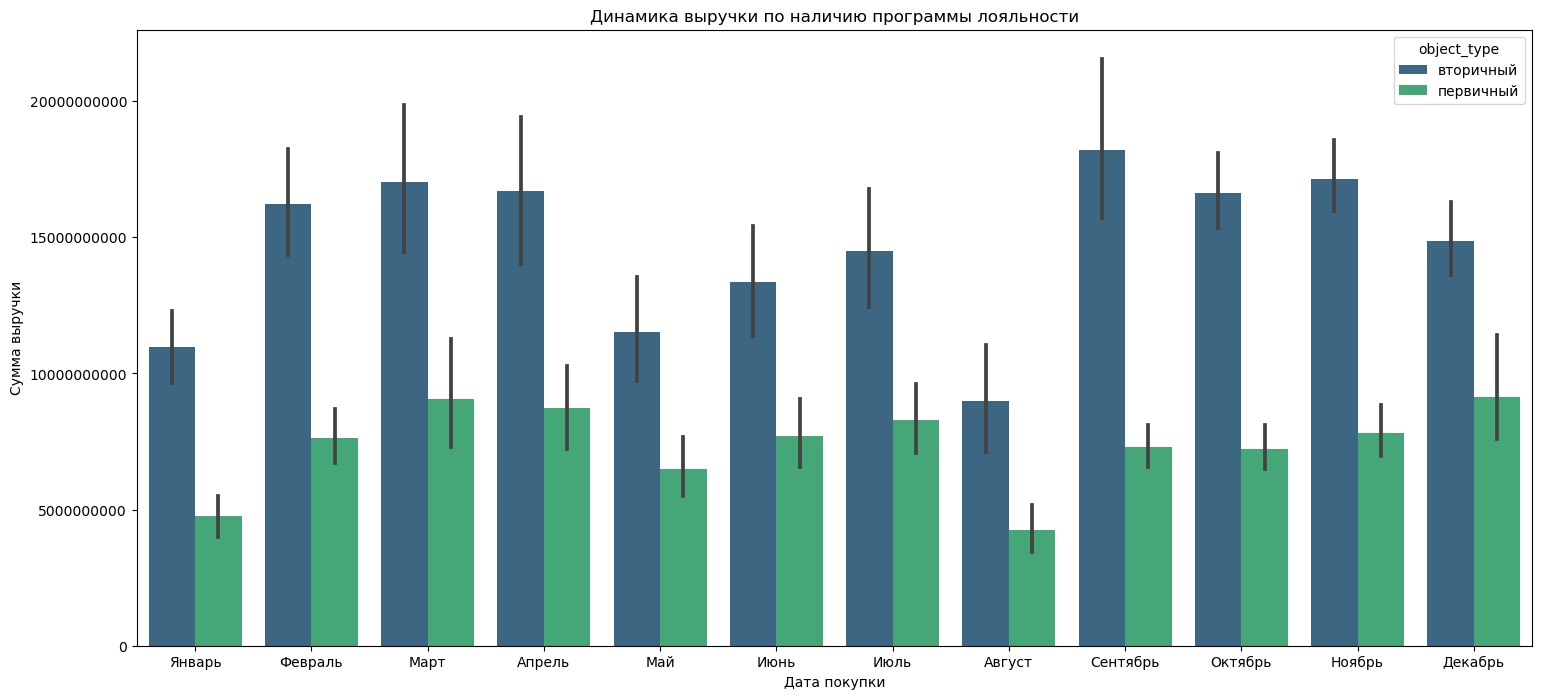

In [210]:
#и выручку визуализируем
plt.figure(figsize=(18, 8))
sns.barplot(data=price, x='month', y='sum', hue='object_type', palette='viridis').set(title='Динамика выручки по наличию программы лояльности',
                                                                                       xlabel='Дата покупки',
 
                                                                                       ylabel='Сумма выручки')
plt.ticklabel_format(axis='y', style = 'plain')
plt.show()

In [211]:
#анализ средней цены по сезонам
seasonal_prices = data.groupby('season')['price'].mean().sort_values()
seasonal_prices

season
Лето     4.153613e+06
Осень    4.302419e+06
Зима     4.319880e+06
Весна    4.526251e+06
Name: price, dtype: float64

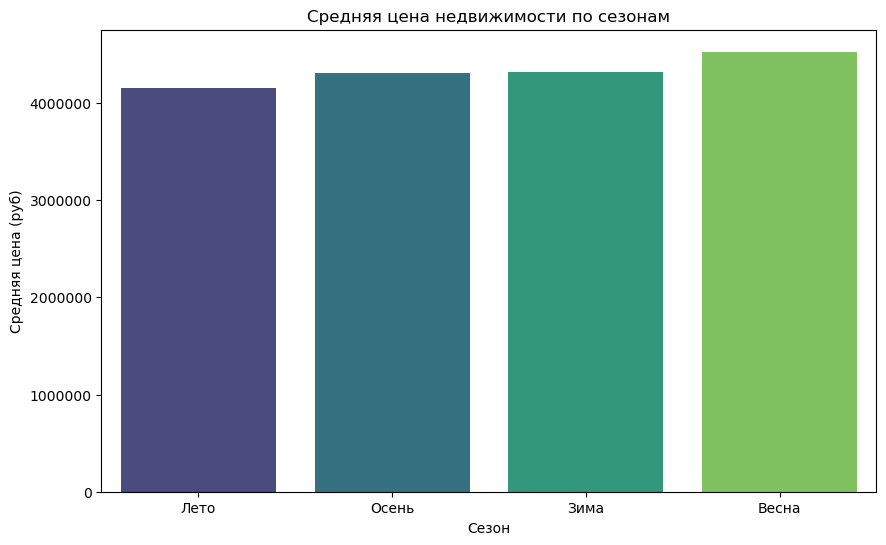

In [ ]:
#визуализируем (да, выводы будут общие)
plt.figure(figsize=(10, 6))
sns.barplot(x=seasonal_prices.index, y=seasonal_prices.values, palette='viridis')
plt.title('Средняя цена недвижимости по сезонам')
plt.ylabel('Средняя цена (руб)')
plt.xlabel('Сезон')
plt.ticklabel_format(axis='y', style = 'plain')
plt.show()

In [213]:
#анализ средней цены по месяцам
month_prices = data.groupby('month')['price'].mean().sort_values()
month_prices

month
8     4.008769e+06
5     4.080659e+06
6     4.097489e+06
1     4.175052e+06
9     4.222875e+06
10    4.265921e+06
7     4.300753e+06
2     4.352284e+06
12    4.389994e+06
11    4.422559e+06
3     4.612216e+06
4     4.699282e+06
Name: price, dtype: float64

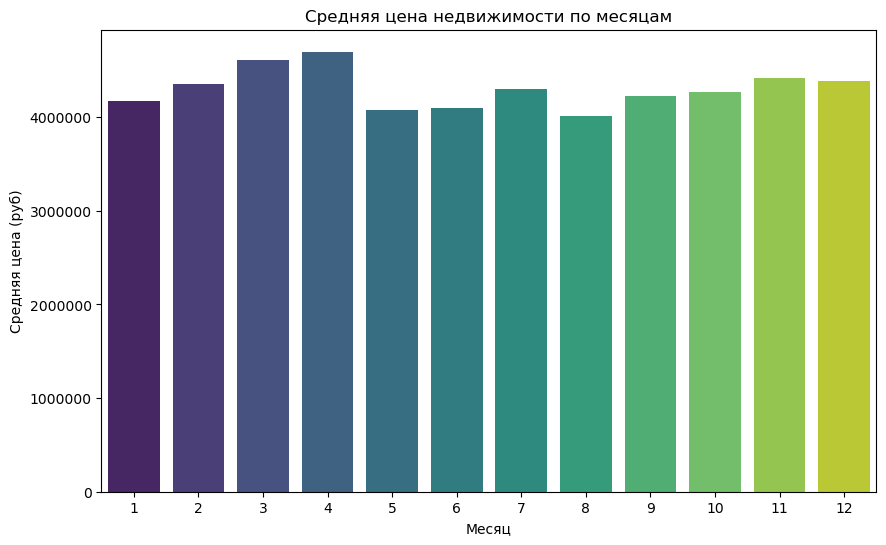

In [214]:
#также визуализируем по месяцам
plt.figure(figsize=(10, 6))
sns.barplot(x=month_prices.index, y=month_prices.values, palette='viridis')
plt.title('Средняя цена недвижимости по месяцам')
plt.ylabel('Средняя цена (руб)')
plt.xlabel('Месяц')
plt.ticklabel_format(axis='y', style = 'plain')
plt.show()

In [215]:
price['season'] = price['date'].dt.month.apply(get_season)
price.head(1)

,month,object_type,date,sum,count,mean,season
0,Январь,вторичный,2019-01-01,14544442295,4708,3.089304e+06,Зима


/var/folders/lb/cd5v5t1n0f38khmnw5v1brv40000gp/T/ipykernel_965/3235244053.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(ax=axes[0], data=price, x='season', y='sum', hue='object_type', ci=None,  palette='viridis')
/var/folders/lb/cd5v5t1n0f38khmnw5v1brv40000gp/T/ipykernel_965/3235244053.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(ax=axes[1], data=price, x='season', y='count', hue='object_type', ci=None,  palette='viridis')
/var/folders/lb/cd5v5t1n0f38khmnw5v1brv40000gp/T/ipykernel_965/3235244053.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(ax=axes[2], data=price, x='season', y='mean', hue='object_type', ci=None,  palette='viridis')


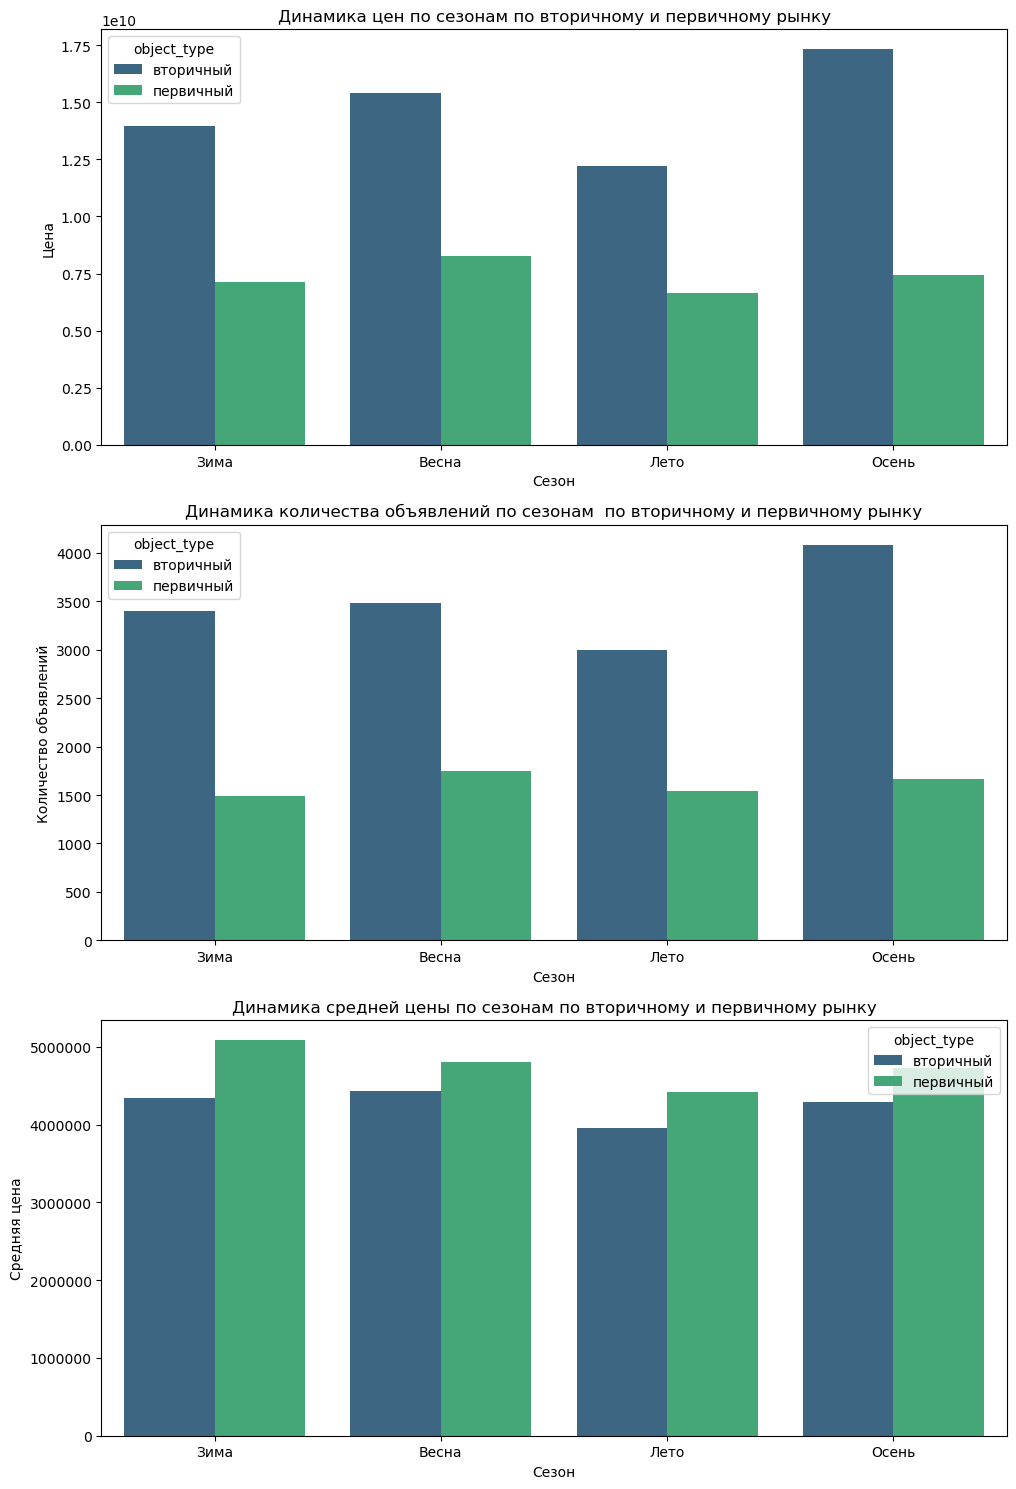

In [217]:
#визуализируем показатели по сезонам
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

sns.barplot(ax=axes[0], data=price, x='season', y='sum', hue='object_type', ci=None,  palette='viridis')
axes[0].set(title='Динамика цен по сезонам по вторичному и первичному рынку', xlabel='Сезон', ylabel='Цена')

sns.barplot(ax=axes[1], data=price, x='season', y='count', hue='object_type', ci=None,  palette='viridis')
axes[1].set(title='Динамика количества объявлений по сезонам  по вторичному и первичному рынку', xlabel='Сезон', ylabel='Количество объявлений')

sns.barplot(ax=axes[2], data=price, x='season', y='mean', hue='object_type', ci=None,  palette='viridis')
axes[2].set(title='Динамика средней цены по сезонам по вторичному и первичному рынку', xlabel='Сезон', ylabel='Средняя цена')

plt.tight_layout()
plt.ticklabel_format(axis='y', style = 'plain')
plt.show()

<div class="alert alert-block alert-success"> 
       По графикам можно увидеть:

    1. Общие выводы:

Если смотреть по сезонам, то выгоднее всего покупать объект недвижимости будет летом, а продавать весной. По месяцам выгоднее всего покупать в августе, заметим, что в мае и июне тоже самые низкие средние цены. А продавать выгоднее всего в апреле (в марте тоже выгодно).

    2. Выводы по первичному рынку:

 Если смотреть по сезонам, то выгоднее всего покупать объект недвижимости будет также летом, а продавать тоже также весной. По месяцам выгоднее всего покупать в августе, заметим, что в мае и сентябре тоже выгодно. А продавать выгоднее всего в декабре (в марте и апреле тоже выгодно).


    3. Выводы по вторичному рынку:

Если смотреть по сезонам, то выгоднее всего покупать объект недвижимости будет также летом, а продавать в осенне-весенний период. По месяцам выгоднее всего покупать в августе (в принципе выгодно в конце весны и летом) . А продавать выгоднее всего в марте и апреле, важного заметить, что также рост цен идет с сентября.

[Вернуться к Навигации](#1)

### <a class="anchor" id="11"></a><div class="alert alert-block alert-info">6. Определение от каких признаков зависит стоимость объекта недвижимости. Нахождение скрытых закономерностей.

<b><a class="anchor" ></a><div class="alert alert-block alert-info">6.1.Корреляционный анализ</b>

In [228]:
#выбор числовых признаков для анализа
numerical_features = ['price', 'area', 'kitchen_area', 'level', 'levels', 'rooms', 'price_for_1m2']

In [229]:
#построение матрицы корреляций
correlation_matrix = data[numerical_features].corr()

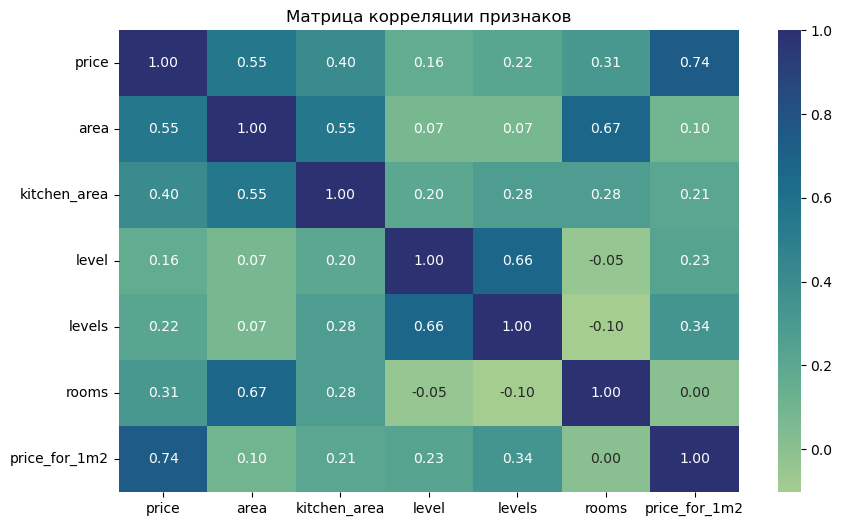

In [230]:
#визуализируем
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='crest')
plt.title('Матрица корреляции признаков')
plt.show()

<div class="alert alert-block alert-success"> 
Как  я и ожидала, наибольший эффект на стоимость квартиры оказывает её площадь и цена за квадратный метр. Из-за различий, которые будут рассмотрены мною далее, корреляция цены за квадратный метр и площади не стопроцентная.


<br>Также важными признаками являются количество комнат и площадь кухни. Они имеют хоть сколько-то значимую связь с ценой. Самая меньшая взаимосвязь с этажем.

<b><a class="anchor"></a><div class="alert alert-block alert-info">6.2.Анализ категориальных признаков</b>

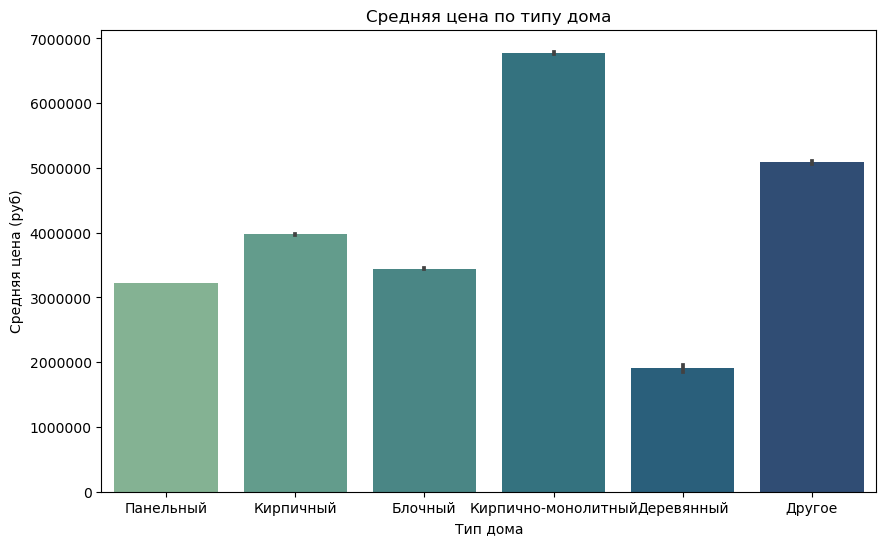

In [ ]:
#средняя цена по типу дома
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='building_type', y='price', palette='crest')
plt.title('Средняя цена по типу дома')
plt.xlabel('Тип дома')
plt.ylabel('Средняя цена (руб)')
plt.ticklabel_format(axis='y', style = 'plain')
plt.show()

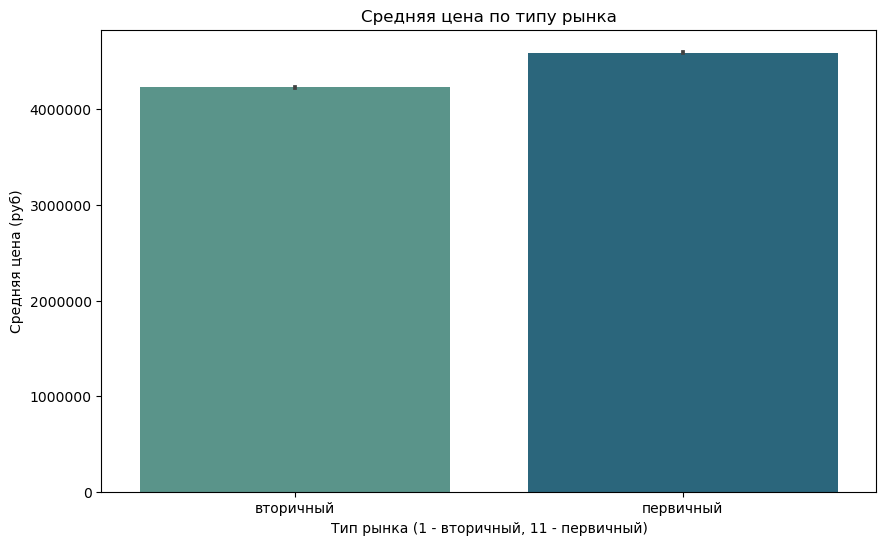

In [223]:
#средняя цена по типу рынка
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='object_type', y='price', palette='crest')
plt.title('Средняя цена по типу рынка')
plt.xlabel('Тип рынка (1 - вторичный, 11 - первичный)')
plt.ylabel('Средняя цена (руб)')
plt.ticklabel_format(axis='y', style = 'plain')
plt.show()

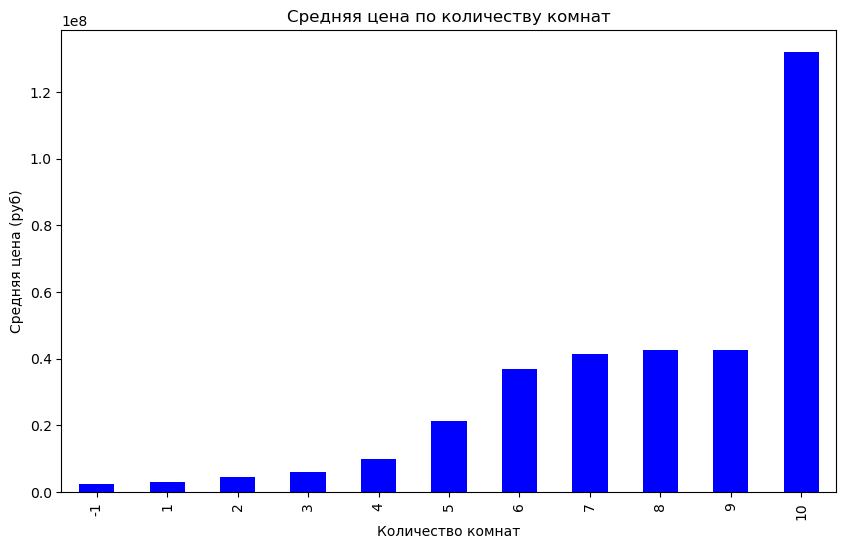

In [227]:
#средняя цена по количеству комнат
avg_price_by_rooms = data.groupby('rooms')['price'].mean()
avg_price_by_rooms.plot(kind='bar', figsize=(10, 6), color='blue')
plt.title('Средняя цена по количеству комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Средняя цена (руб)')
plt.show()

<div class="alert alert-block alert-success"> 
Если различия в цене между категориями значительные, это указывает на влияние категории на стоимость. 
<br>1. По графикам можно увидеть, что средняя цена Кирпичной-монолитных построек значительно выше всех остальных, а деревянные значительно ниже.
<br>2. Средняя цена на первичном рынке выше средней цены на вторичном (что логично).
<br>3. Также очевидно, что че больше комнат, тем больше средняя цена.

<b><a class="anchor"></a><div class="alert alert-block alert-info">6.3.Взаимодействие признаков</b>

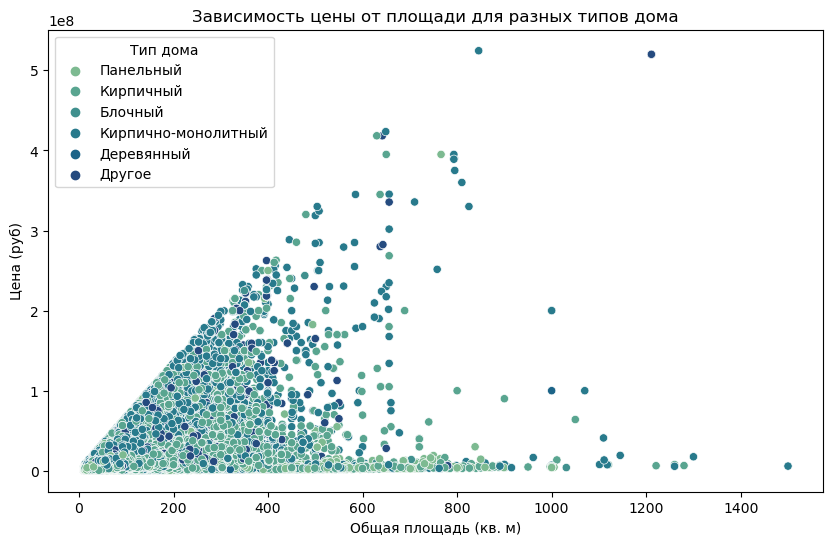

In [231]:
#зависимость цены от площади для разных типов дома
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='area', y='price', hue='building_type', palette='crest')
plt.title('Зависимость цены от площади для разных типов дома')
plt.xlabel('Общая площадь (кв. м)')
plt.ylabel('Цена (руб)')
plt.legend(title='Тип дома')
plt.show()


<b><a class="anchor"></a><div class="alert alert-block alert-info">6.4.Визуализация скрытых закономерностей</b>

Визуализируем зависимость цены от площади, этажа и этажности.

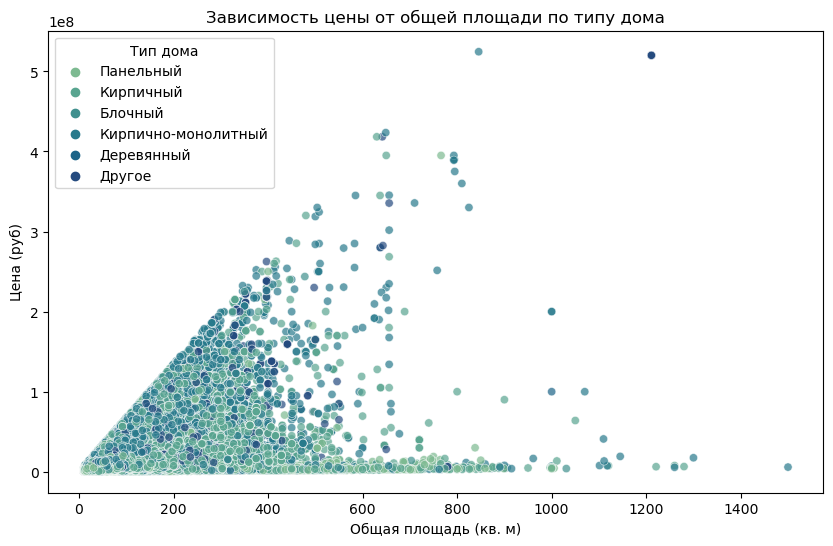

In [232]:
#зависимость цены от площади
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='area', y='price', hue='building_type', palette='crest', alpha=0.7)
plt.title('Зависимость цены от общей площади по типу дома')
plt.xlabel('Общая площадь (кв. м)')
plt.ylabel('Цена (руб)')
plt.legend(title='Тип дома')
plt.show()


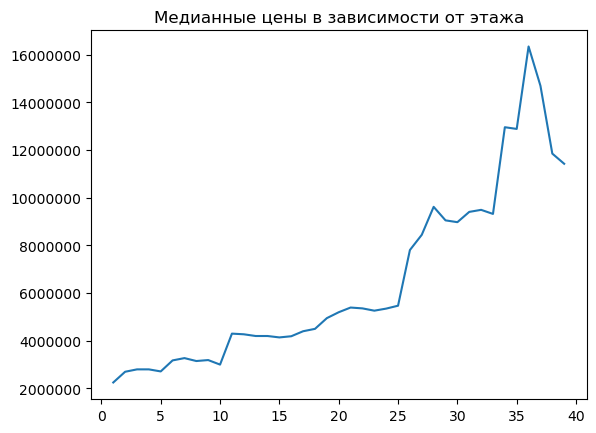

In [ ]:
#проводим анализ этажа
plt.title("Медианные цены в зависимости от этажа")
plt.plot(data.groupby(by = 'level')['price'].median())
plt.ticklabel_format(axis='y', style = 'plain')

В высоких зданиях высокие цены на жилье. В России таких мало и обычно только в крупных городах. Люди готовы доплачивать за высокий этаж и вид на город.

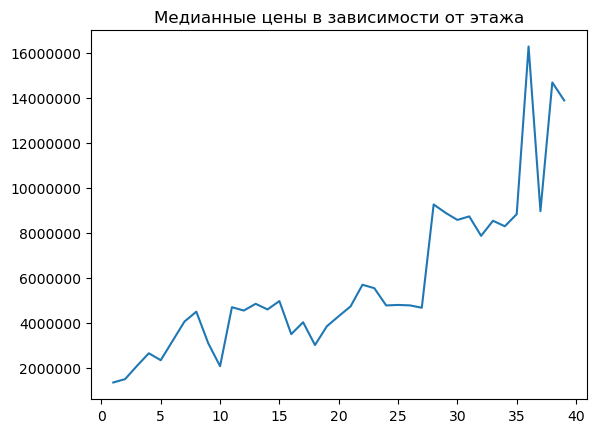

In [235]:
#проводим анализ этажности
plt.title("Медианные цены в зависимости от этажа")
plt.plot(data.groupby(by = 'levels')['price'].median())
plt.ticklabel_format(axis='y', style = 'plain')

График похож на предыдущий. Хотя есть понижения цен на 5 и 10-этажные здания. Вероятно, это типовые советские жилые блоки. В высотных зданиях медианная стоимость квартир выше. Если бы мы брали среднее значение, читаемость портили бы дорогие дома, которые 1-3 этажа

<div class="alert alert-block alert-success"> 
УРА! Мы нашли скрытые закономерности цена с этажом и этажностью. Несмотря на то, что по матрице корреляций у них слабая связь, мы видим определенную тенденцию.

[Вернуться к Навигации](#1)

### <a class="anchor" id="12"></a><div class="alert alert-block alert-info">7. Выдвижение собственной гипотезы и ее проверка статистическими методами

Проверка гипотезы: "Сезонность влияет на стоимость недвижимости, и средняя цена недвижимости в летний сезон выше, чем в зимний." <br>
Формулировка гипотез: <br>

1. Нулевая гипотеза 𝐻0: <br>
Средняя цена недвижимости одинаковая для зимнего и летнего сезонов. <br>
𝐻0: 𝜇 winter = 𝜇 summer <br>

2. Альтернативная гипотеза 𝐻1: <br>
Средняя цена недвижимости в летний сезон выше, чем в зимний. <br>
𝐻1: 𝜇 summer > 𝜇 winter <br>
​

In [236]:
data.head(1)

,price,date,code,building_type,level,levels,rooms,area,kitchen_area,object_type,reg_name,price_for_1m2,area_for_room,month,season
0,6050000,2018-02-19,2661,Панельный,8,10,3,82.6,10.8,вторичный,Санкт-Петербург,73244.55,23.93,2,Зима


In [239]:
from scipy.stats import ttest_ind, levene, shapiro

In [240]:
#разделяем данные на зимний и летний сезоны
winter_prices = data[data['season'] == 'Зима']['price']
summer_prices = data[data['season'] == 'Лето']['price']

In [243]:
#проверка нормальности данных для зимнего и летнего сезонов
stat_winter, p_winter = shapiro(winter_prices)
stat_summer, p_summer = shapiro(summer_prices)

print(f"Тест Шапиро-Уилка для зимы: p-value = {p_winter}")
print(f"Тест Шапиро-Уилка для лета: p-value = {p_summer}")

Тест Шапиро-Уилка для зимы: p-value = 0.0
Тест Шапиро-Уилка для лета: p-value = 0.0


Тут просто скажу, что этот НОЛЬ потрепал мне немало нервов, как в принципе, потом я узнала, что он потрепал нервы не только мне, но и всей группе.)))))


In [244]:
#проверка гомогенности дисперсий
stat, p_levene = levene(winter_prices, summer_prices)
print(f"Тест Левена на равенство дисперсий: p-value = {p_levene}")

Тест Левена на равенство дисперсий: p-value = 7.045086647542095e-59


Отвергаем нулевую гипотезу с высокой степенью уверенности, дисперсии значимо отличаются.

Тест Манна-Уитни позволяет проверить различия между двумя независимыми выборками без предположений о нормальности их распределений. Этот метод полезен в ситуациях, когда данные не соответствуют требованиям параметрических тестов.

In [246]:
#проведение t-теста или Манна-Уитни
if p_winter > 0.05 and p_summer > 0.05 and p_levene > 0.05:
    #если распределение нормальное и дисперсии равны
    stat, p = ttest_ind(summer_prices, winter_prices)
    print(f"Результат t-теста: p-value = {p}")
else:
    #если хотя бы одно из предположений не выполняется
    from scipy.stats import mannwhitneyu
    stat, p = mannwhitneyu(summer_prices, winter_prices)
    print(f"Результат U теста Манна-Уитни: p-value = {p}")

Результат U теста Манна-Уитни: p-value = 0.0


<div class="alert alert-block alert-success"> 
 p-value стремится к 0. 
<br>Таким образом, можно отклонить нашу гипотезу о равенстве средних цен по летнему и зимнему сезону и принять альтернативную гипотезу: средние цена в летний сезон выше, чем в зимний.

КРАААСОООТААА

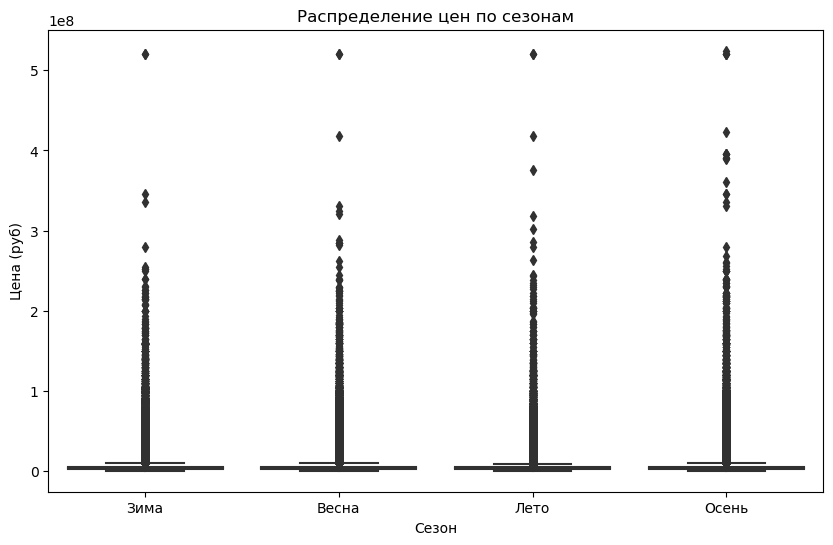

In [248]:
#визуализация
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='season', y='price', palette='crest')
plt.title('Распределение цен по сезонам')
plt.xlabel('Сезон')
plt.ylabel('Цена (руб)')
plt.show()

[Вернуться к Навигации](#1)

### <a class="anchor" id="13"></a><div class="alert alert-block alert-info">8. Модель прогноза цены объекта недвижимости

In [249]:
data.head(1)

,price,date,code,building_type,level,levels,rooms,area,kitchen_area,object_type,reg_name,price_for_1m2,area_for_room,month,season
0,6050000,2018-02-19,2661,Панельный,8,10,3,82.6,10.8,вторичный,Санкт-Петербург,73244.55,23.93,2,Зима


In [266]:
%pip install lightgbm
import lightgbm as lgb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 1.2 MB/s eta 0:00:0000:0100:010m
Note: you may need to restart the kernel to use updated packages.


In [267]:
#создаем функцию для преобразования в категориальные переменные
def encode_categorical(data):
    label_encoder = LabelEncoder()
    data['reg_name'] = label_encoder.fit_transform(data['reg_name'])
    data['building_type'] = label_encoder.fit_transform(data['building_type'])
    data['object_type'] = label_encoder.fit_transform(data['object_type'])
    data['season'] = label_encoder.fit_transform(data['season'])
    return data

In [268]:
#подготовка данных (зависимая переменная и независимые)
def prepare_data(data):
    data = encode_categorical(data)
    
    X = data[['reg_name', 'building_type', 'object_type', 'level', 'levels', 
            'rooms', 'area', 'kitchen_area', 'price_for_1m2', 'area_for_room', 'season']]
    y = data['price']  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    X_train_sampled, _, y_train_sampled, _ = train_test_split(X_train, y_train, test_size=0.9, random_state=42)

    return X_train_sampled, X_test, y_train_sampled, y_test

In [269]:
#пишем параметры и функцию
def train_model(X_train, y_train):
    train_data = lgb.Dataset(X_train, label=y_train)
    
    params = {
        'objective': 'regression',  
        'metric': 'rmse',           
        'boosting_type': 'gbdt',    
        'num_leaves': 31,           #количество листьев
        'learning_rate': 0.05,      #скорость обучения
        'feature_fraction': 0.9,    
        'bagging_fraction': 0.8,    #процент для обучения модели
        'bagging_freq': 5,          
        'max_depth': -1,            
        'num_threads': -1           
    }
    
    #обучаем модель
    model = lgb.train(params, train_data, 1000) 
    return model

In [270]:
#функция для рассчета средне квадратического отклонения и ошибки
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse**0.5
    return rmse

In [271]:
#проверка
X_train, X_test, y_train, y_test = prepare_data(data)
model = train_model(X_train, y_train)
rmse = evaluate_model(model, X_test, y_test)

print(f'Оценка качества модели(RMSE): {rmse}')

/var/folders/lb/cd5v5t1n0f38khmnw5v1brv40000gp/T/ipykernel_965/1612964824.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['reg_name'] = label_encoder.fit_transform(data['reg_name'])
/var/folders/lb/cd5v5t1n0f38khmnw5v1brv40000gp/T/ipykernel_965/1612964824.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['building_type'] = label_encoder.fit_transform(data['building_type'])
/var/folders/lb/cd5v5t1n0f38khmnw5v1brv40000gp/T/ipykernel_965/1612964824.py:6: SettingWithCopyWarning: 
A value is tryi

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003774 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1200
[LightGBM] [Info] Number of data points in the train set: 428286, number of used features: 11
[LightGBM] [Info] Start training from score 4341571.509213
Оценка качества модели(RMSE): 726934.8821514825


<div class="alert alert-block alert-success"> 
По оценке качества модели, которую мы приняли оценивать на основании среднеквадратического отклонения, которое составило 726 934, можно сделать вывод, что в принципе, модель хороша. Однако до такого как я пришла к такому результату было проверено неколько вариантов независимых переменных и эта комбинация показала лучший эффект. Вероятнее, есть еще способы для улучшения показателя, но они пока не выявлены.

[Вернуться к Навигации](#1)

### <a class="anchor" id="14"></a><div class="alert alert-block alert-info">ВЫВОД

<div class="alert alert-block alert-success"> 
Ну в общем что там с данными познакомилась, датасеты соединили, мило, что Крым был два раза. <br>

Пропуски заполнила именно этим способом, так как другие (медиана и Рандомный лес) не грузились от слова совсем. <br>

Вроде всякую дичь убрала. Когда выгодно продаавать и покупать посмотрела (хотя тут в общем сложно смотреть, когда ты не ищешь что-то конкретное). <br>

Ну мне понравились скрытые закономерности. <br> 

Про свою гипотезу, меня все еще смущает p-value  равное 0, ну и ладно. <br>

 Ну а модель прогноза капец вообще какой-то, ну я что-то нашла. <br>

[Вернуться к Навигации](#1)